# Superdense Coding
Superdense coding is a quantum communication protocol that allows **2 Classical bits** to be transmitted using only **1 qubit**,thank to shared entanglement.
In this notebook you will learn :
- The Theory behind superdense coding
- How entanglement enables faster -than-classical communication capacity.
- How to implement superdense coding using  **Qiskit AerSimulator**
- How to 2-bit message maps to quantum gates.
- How Bob decodes Alice's encoded qubit.

---

## 1.Import Qiskit & Initialize AerSimulator

In [6]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import AerSimulator


## 2. Theory Refresher
Alice and Bob share an entangled Bell state:

$$
\begin{align}
|\beta_{00}\rangle=\frac{|00\rangle + |11\rangle}{\sqrt{2}}
\end{align}
$$

Alice wants to send **2 classical bits(b1 b0)** to Bob.

| Message(b1 b0) |MSB b1 | LSB b0 | Gate Alice Applies | Bell State Produced |
| -------------- |-------|--------| ------------------ | ------------------- |
| 00             | 0     | 0      | I(Do nothing)      | $ \beta_{00} $      |
| 01             | 0     | 1      | X                  | $ \beta_{01} $      |
| 10             | 1     | 0      | Z                  | $ \beta_{10} $      |
| 11             | 1     | 1      | ZX                 | $ \beta_{11} $      |

Bob then perform:
- CNOT
- Hadamard
- Measure

To recover Alice's original **2 classical bits**.

**1. Why MSB (b1) is linked to Z Gate?**
- Phase distingiushes the top bit(b1).Z-Gate flips the **Phase**.

**2. Why LSB (b0) is linked to X Gate?**
- These changes the lower classical bit.X-Gate flips the **value**.

## 3. Step 1 - Create Bell State
Alice (q0) and Bob (q1) need a shared entangled state.


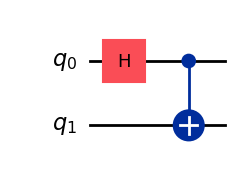

In [2]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0,1)
bell.draw('mpl')

## Step 2 - Alice Encodes 2 Bits
Alice wants to send a 2-Bit message: **b1 b0**

**Mapping**:
- if b1=1 $ {\rightarrow} $ Apply Z(Phase flip) encodes MSB
- If b0=1 $ {\rightarrow} $ Apply X(bit flip) encodes LSB

In [3]:
def superdense_coding(qc,b1,b0):
    # this modifies her half of the entangled pair
    if b1 == 1:
        qc.z(0)
    if b0 == 1:
        qc.x(0)
    return qc

## step 3 - Bob Decodes
Bob receives Alice's qubit and now has **both qubit**. To decode ,Bob performs:

1. **CNOT(q0 $ {\rightarrow} $ q1)** - disentangles the pair
2. **Hadamard(q0)** - converts Bell basis to computational basis

This ensures measurement = original bits.


In [4]:
def bob_decode(qc):
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])
    return qc

## Step 4 - Full Superdense Coding Function

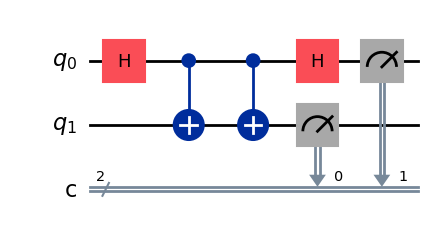

In [29]:
def superdense_coding(b1,b0):
    qc=QuantumCircuit(2,2)
    # create Bell state
    qc.h(0)
    qc.cx(0,1)
    # Alice Encode
    if b1 == 1:
        qc.z(0)
    if b0 == 1:
        qc.x(0)
    # Bob Decodes
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[1,0])
    return qc

# let check for bit 00 to how our superdense coding circuit look.you also check for oher bits like 01, 10, 11 etc.
code_00 =superdense_coding(0,0)
code_00.draw('mpl')




## Step 5 - Test All 4 Possible Messages
We test Messages : 00 ,01, 10, 11

In [20]:
sim = AerSimulator()
messages=[(0,0),(0,1),(1,0),(1,1)]
results={}
for b1,b0 in messages:
    qc=superdense_coding(b1,b0)
    tqc = transpile(qc,sim)

    job = sim.run(tqc, shots =1024).result()
    
    counts= job.data()['counts']
    results[(b1,b0)]=counts

## 6. Step 6- Visualize Results


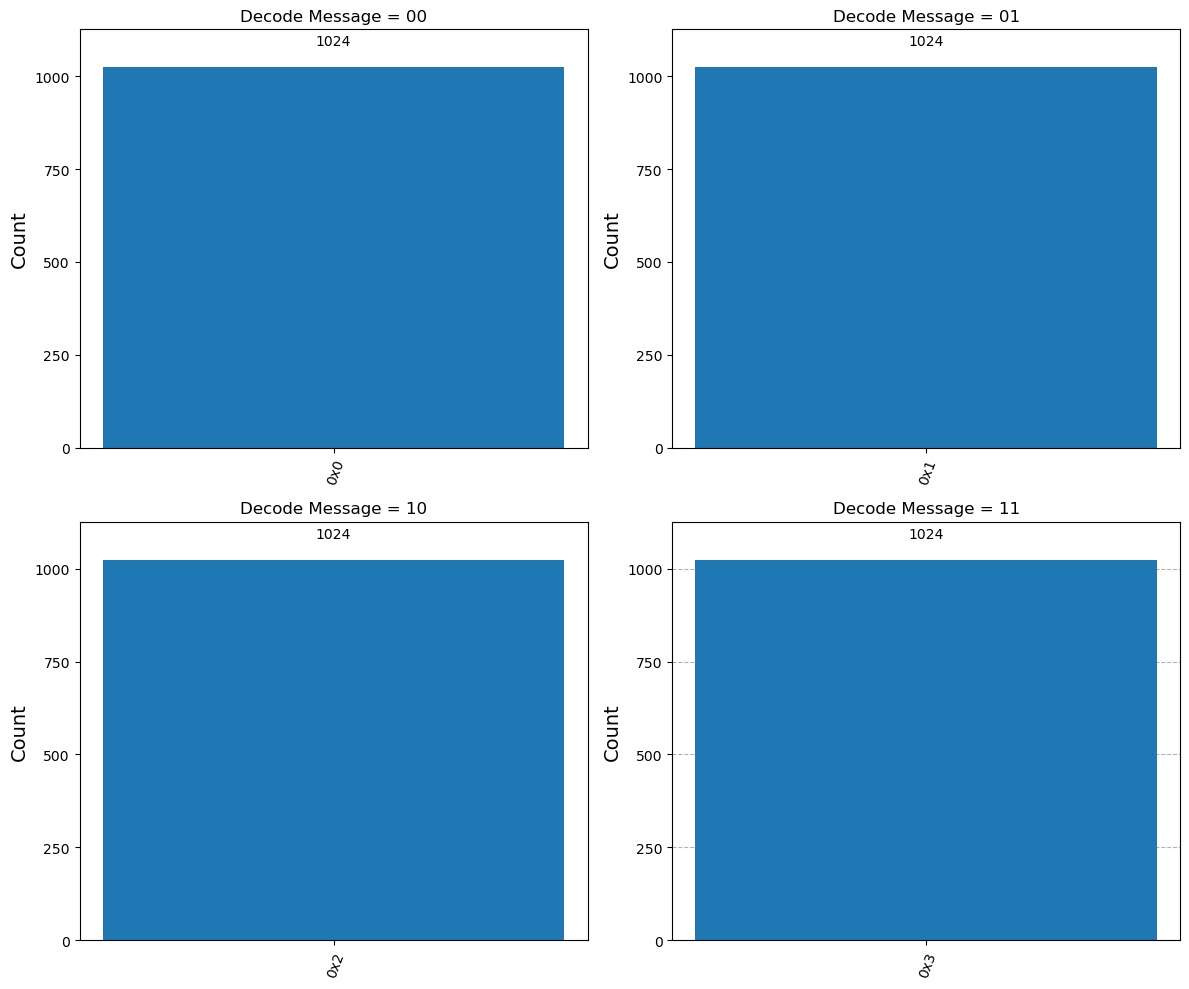

In [21]:
fig ,axes =plt.subplots(2,2,figsize=(12,10))
axes = axes.flatten()
for idx,(msg,counts) in enumerate(results.items()):
    b1,b0 = msg
    plot_histogram(counts, ax=axes[idx])
    axes[idx].set_title(f"Decode Message = {b1}{b0}")
plt.tight_layout()
plt.show()

look at each bit histogram it show result 1024 this means circuit perfectly transmitted your message in every trial.
 
 this notebook Demonstrate  what is superdense coding and how it work by creating bell state pair. 
 
 Superdense coding allow you send 2 classical bits using only 1 qubit ,thank to entanglement.it is used in quantum network/quantum internet ,used in QKD(Quantum Key Distribution) for secure communication and data compression.

---

**Author:** *Shreya Palase*  

**Date Created:**  *4-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day11_SuperdenseCoding.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>